<div class="alert alert-block alert-warning">
<h1><span style="color:green"> AI7101 Machine Learning with Python-001 (2025 Fall)

<h2><span style="color:green"> Lab-4 </span><h2>
</div>

TAs: Shuxian Zou, Jiacheng Cui
---
---

## 1. Decision Tree Algorithm (60 points)
**Decision Tree (DT)** algorithm belongs to the family of supervised machine learning algorithms which can be used for both regression and classification tasks. This algorithm takes in data $(X\in\mathbb{R}^{n\times d},$ where $n$ is the number of samples and $d$ is the number of features in each sample) and constructs a tree-structured classifier or regression model.

Following are the main steps to construct a DT:  
**Step-1:** Begin the tree with the root node where entire dataset is considered.  
**Step-2:** Find the best attribute/feature in the dataset using Attribute Selection Measure (ASM) and declare this attribute as root node label.  
**Step-3:** Divide the dataset into subsets using conditions on the values of root node data. Each subset of data will become a child node.  
**Step-4:** At each child node, use ASM and further divide the dataset.  
**Step-5:** Recursively make new child nodes using the subsets of the dataset and  continue this process until a stage is reached where one cannot create the child node and call the final nodes as leaf nodes.





## 1.1 Dataset
We will use a toy dataset 'WEKA Weather Data' published by Fordham University for decision tree algorithm related tasks.

In [101]:
import  pandas as pd               # to handle tabular-structured heterogeneous data, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                 # linear algebra and numerical computing
import matplotlib.pyplot as plt    # for data visualization
import seaborn as sns              # for data visualization
import os                          # for paths and operating system related commands

In [102]:
# prepare pandas dataframe

header =   "outlook,temperature,humidity,windy,play"
data = \
'''sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no
overcast,cool,normal,TRUE,yes
sunny,mild,high,FALSE,no
sunny,cool,normal,FALSE,yes
rainy,mild,normal,FALSE,yes
sunny,mild,normal,TRUE,yes
overcast,mild,high,TRUE,yes
overcast,hot,normal,FALSE,yes
rainy,mild,high,TRUE,no'''


df = pd.DataFrame([sub.split(",") for sub in data.split('\n')])
df.columns = header.split(',')

print('WEKA Weather Data published by Fordham University:\n\n')
df

WEKA Weather Data published by Fordham University:




,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [103]:
print('Number of Samples             = ', df.shape[0])
print('Number of Attributes/Features = ', df.shape[1]-1) # last column contains class labels

Number of Samples             =  14
Number of Attributes/Features =  4


In [104]:
print('Attributes/Features Names : ' , list(df.columns), '\n\n')
print('Unique Values of Attributes:\n')
attrib_name_vals_dict = {}
for col_name in df.columns:
    attrib_name_vals_dict[col_name] = list(df[col_name].unique())
    print(f"'{col_name}' = {df[col_name].unique()} ")

Attributes/Features Names :  ['outlook', 'temperature', 'humidity', 'windy', 'play'] 


Unique Values of Attributes:

'outlook' = ['sunny' 'overcast' 'rainy'] 
'temperature' = ['hot' 'mild' 'cool'] 
'humidity' = ['high' 'normal'] 
'windy' = ['FALSE' 'TRUE'] 
'play' = ['no' 'yes'] 


In [105]:
print(f"Number of Class = {len(df['play'].unique())}")

Number of Class = 2


### 1.1(a) : Get Conditional Data from DataFrame (5 points)

In [106]:
def get_conditional_data(df, condition_list):
    # input: dataframe and list of tuples. each tuple should be of the form: (attrib_name, attrib_value)
    # output: returns conditional data samples from the dataframe

    bools = np.array([True]*df.shape[0])  # initially assume all rows are valid
    for attrib_name, attrib_value in condition_list:
        # TODO: update 'bools' to keep only rows where the condition (attrib_name == attrib_value) holds
        # You should use pandas filtering: df[attrib_name] == attrib_value
        # Then combine it with current 'bools' using logical AND
        # Hint: np.array(...) & np.array(...)

        # ===> YOUR CODE HERE <===
        bools = np.array(bools) & np.array(df[attrib_name] == attrib_value)
        pass


    return df[bools]


In [107]:
# === Condition to test ===
cond_list = [('outlook', 'sunny'), ('windy', 'FALSE')]

# === Expected Output ===
expected_df = df[(df['outlook'] == 'sunny') & (df['windy'] == 'FALSE')]

# === Run Test ===
result_df = get_conditional_data(df, cond_list)
# === Check correctness ===
try:
    pd.testing.assert_frame_equal(result_df.reset_index(drop=True), expected_df.reset_index(drop=True))
    print("✅ Test Passed! The function correctly returns the filtered DataFrame.")
except AssertionError as e:
    print("❌ Test Failed! The returned DataFrame is incorrect.")
    print(e)

✅ Test Passed! The function correctly returns the filtered DataFrame.


### 1.1(b) : Get Categorical Distribution of Class Attribute from DataFrame (5 points)

In [108]:
def get_class_distribution(df, class_attrib_name):
    # input: dataframe, name of the class attribute in dataframe
    # output: returns the categorical distribution of class attribute in the given dataframe

    # Step 1: compute frequency of each class (hint: use value_counts())
    counts = df[class_attrib_name].value_counts()   # do not convert to numpy yet

    # Step 2: TODO - compute class probabilities from counts
    # ===> YOUR CODE HERE <===
    # You should normalize the counts to sum to 1, by dividing by the total count.
    # Hint: use counts.values / counts.sum()

    probs = (counts.values/counts.sum())  # placeholder, replace with correct expression


    # Step 3: get class labels
    class_labels = list(counts.index)

    return class_labels, probs

In [109]:
# --- Ground Truth ---
expected_labels = ['yes', 'no']
expected_probs = [9/14, 5/14]

# --- Test ---
labels, probs = get_class_distribution(df, 'play')
try:
    assert labels == expected_labels, "❌ Error: Class labels do not match the expected output."
    assert np.allclose(probs, expected_probs, atol=1e-6), "❌ Error: Class probabilities are incorrect."
    print("✅ Test passed! The function correctly computes the class distribution for 'play'.")
except AssertionError as e:
    print(str(e))
    print("Returned labels:", labels)
    print("Returned probabilities:", probs)


✅ Test passed! The function correctly computes the class distribution for 'play'.


In [110]:
def plot_categorical_dis(class_labels,class_probs):

    df = pd.DataFrame({
        "Class": class_labels,
        "Probability": np.array(class_probs) * 100
    })

    fig = plt.figure(figsize = (6, 3))

    # creating the bar plot
    ax = sns.barplot(data=df, x=class_labels, y=np.array(class_probs)*100)


    plt.xlabel("Class Labels", fontsize=15)
    plt.ylabel("Probabilities (%)", fontsize=15)
    plt.title("Categorical Distribution of Class: 'Play' ", fontsize=15)
    plt.show()

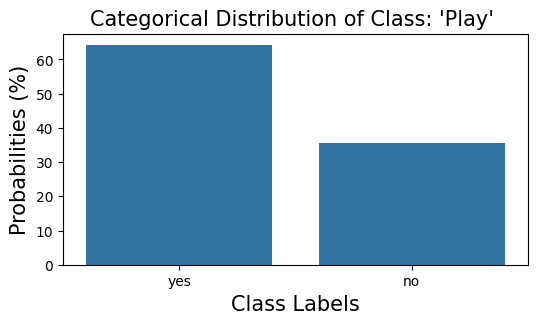

In [111]:
plot_categorical_dis(labels, probs)

In [112]:
# this function can be used to find categorical distribution of unique values of any attribute

def get_attrib_distribution(df, attrib_name):
    # input: dataframe, name of the attribute in dataframe
    # output: returns the categorical distribution of the unique values of attribute in the given dataframe

    counts = df[attrib_name].value_counts().to_numpy()
    probs  = counts/sum(counts)
    attrib_unique_values = list(df[attrib_name].value_counts().index)
    return attrib_unique_values , probs

print(get_attrib_distribution(df, 'outlook'))

(['sunny', 'rainy', 'overcast'], array([0.35714286, 0.35714286, 0.28571429]))


## 1.2 Attribute Selection Measure
At each decision node, algorithm uses an Attribute Selection Measure (ASM) to pick the best attribute from dataset. ASM is a heuristic for selecting the splitting criterion that partitions data into the best possible manner. It is also known as splitting rule because it helps us to decide which feature/attribute to split on at each step in building the tree. ASM assigns a rank to each feature(or attribute). Best score/rank attribute will be selected as a splitting attribute. Most popular selection measures are Information Gain, Information Gain Ratio, and Gini Index. Before moving to brief introduction of ASMs, we define a few terminologies/notations.

Assume that $\mathcal{X}=\{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^{n}$ represents the dataset containing $n$ samples and each sample contains $d$ attributes and a class label. Values of $d$ attributes in $i_{\text{th}}$ sample are represented by $\mathbf{x}^{(i)}=(x_1^{(i)},x_2^{(i)},\ldots,x_d^{(i)})^\top$. The notation $vals(x_j)$ represents the possible values of $x_j$  ($j_{\text{th}}$ attribute) e.g. if  $x_j=\text{'Temperature'}$, then $vals(x_j)=\{\mathrm{Hot}, \mathrm{Mild}, \mathrm{Cool}\}$.  Moreover, assume that there are $K$ classes in the dataset and let $\mathrm{\mathbf{p}}=(p_1,p_2,\ldots,p_K)^\top$ represent the vector containing percentage (or probability) of each class present in the dataset.
<br><br><br>
### 1.2(a) : Entropy (5 points)
Entropy of categorical distribution $\mathbf{p}$, denoted as $\mathrm{H}(\mathbf{p})$, is defined as follows:
$$\mathrm{H}(\mathbf{p})=-\sum_{k=1}^{K} p_{k}\log_{2}(p_{k})$$

In [113]:
def get_entropy(p):
    # input: categorical distribution (list or array of probabilities, must sum to 1)
    # output: entropy of the distribution, computed as H(p) = -∑ p_k * log2(p_k)
    p = np.array(p)
    p_nonzero = p[p > 0]

    # TODO your code here
    entropy = - np.sum(p_nonzero * np.log2(p_nonzero))

    return entropy


In [114]:
def test_get_entropy():
    try:
        # Test Case 1: Uniform distribution over 4 categories
        p1 = [0.25, 0.25, 0.25, 0.25]
        expected1 = 2.0  # log2(4) = 2
        result1 = get_entropy(p1)
        assert np.isclose(result1, expected1, atol=1e-6), "❌ Error in uniform distribution entropy"

        # Test Case 2: Skewed binary distribution
        p2 = [0.8, 0.2]
        expected2 = -(0.8 * np.log2(0.8) + 0.2 * np.log2(0.2))  # ≈ 0.7219
        result2 = get_entropy(p2)
        assert np.isclose(result2, expected2, atol=1e-6), "❌ Error in skewed distribution entropy"

        # Test Case 3: Deterministic distribution (zero entropy)
        p3 = [1.0, 0.0]
        expected3 = 0.0
        result3 = get_entropy(p3)
        assert np.isclose(result3, expected3, atol=1e-6), "❌ Error in deterministic distribution entropy"

        # Test Case 4: Three-class distribution
        p4 = [0.5, 0.3, 0.2]
        expected4 = -(0.5*np.log2(0.5) + 0.3*np.log2(0.3) + 0.2*np.log2(0.2))  # ≈ 1.485
        result4 = get_entropy(p4)
        assert np.isclose(result4, expected4, atol=1e-6), "❌ Error in 3-class distribution entropy"

        print("✅ All entropy tests passed! Your function works correctly.")

    except AssertionError as e:
        print(str(e))

test_get_entropy()


✅ All entropy tests passed! Your function works correctly.


### 1.2(b) : Information Gain $\mathrm{(IG)}$ (5 points)

Information Gain associated with $x_j$ attribute (after splitting the source dataset into multiple child subsets), denoted as $\operatorname{IG}(\mathbf{p},x_j)$, is calculated as follows:
$$
{\displaystyle \underbrace{\operatorname{IG}(\mathbf{p},x_j)} _{\text{information gain}}=\underbrace {\mathrm {H}(\mathbf{p})}_{\text{entropy (parent)}}-\underbrace {\mathrm {H} (\mathbf{p}\mid x_j)}_{\text{weighted sum of entropies (children)}}}$$

where $\mathrm {H}(\mathbf{p}\mid x_j)$ is the weighted sum of entropies of class labels present in child node data subsets. Definition of $\mathrm {H}(\mathbf{p}\mid x_j)$ is given below:  

$$
\mathrm {H}(\mathbf{p}\mid x_j)=\sum _{v\in vals(x_j)} \Pr(x_j=v)\times\mathrm{H}(\mathbf{p}\mid x_j=v),$$
where $\Pr(x_j=v)$ is the percentage of samples in source data in which value of $j_{\text{th}}$ feature is equal to $v$. In order to calculate $\mathrm{H}(\mathbf{p}\mid x_j=v)$, we first split the source data at decision node and then select the subset in which value of $x_j$ attribute is equal to $v$. In this subset of data, we find the probability of each class label, i.e. $\Pr(k\mid x_j)$, and then compute conditional entropy as follows:
$$\mathrm{H}(\mathbf{p}\mid x_j=v) = -\sum_{k=1}^{K} \Pr(k\mid x_j=v)\times\log_{2}\left(\Pr(k\mid x_j=v)\right).$$
Information gain computes the difference between entropy of class labels before split and average entropy of class labels after splitting the source dataset based on given attribute values.
In layman terms, it calculates how much information a feature provides us about a class. Therefore, a node/attribute having the highest information gain is picked for decision node. This process is repeated for every decision node.

In [115]:
def get_info_gain(df, attrib_name=None, class_attrib_name=None):
    # input: df is the full dataset
    # attrib_name: a feature column (x_j)
    # class_attrib_name: the target label (e.g., "play")
    # output: information gain for splitting on attrib_name to predict class_attrib_name

    # Step 1: compute unconditional entropy H(p)
    class_labels, class_probs = get_class_distribution(df, class_attrib_name)
    H_p = get_entropy(class_probs)

    # Step 2: compute the probability of each value of attribute x_j
    attrib_unique_values, attrib_probs = get_attrib_distribution(df, attrib_name)

    # Step 3: compute conditional entropy H(p | x_j)
    H_p_xj = 0
    for v_i, v in enumerate(attrib_unique_values):
        df_xj_v = get_conditional_data(df, [(attrib_name, v)])

        class_labels_xj_v, class_probs_xj_v = get_class_distribution(df_xj_v, class_attrib_name)

        H_p_xj_v = get_entropy(class_probs_xj_v)

        # ===> YOUR CODE HERE <===
        # Update the conditional entropy by adding Pr(x_j=v) * H(p | x_j=v)
        # Hint: use attrib_probs[v_i] * H_p_xj_v
        H_p_xj += attrib_probs[v_i] * H_p_xj_v
        pass

    # Step 4: compute final information gain
    # ===> YOUR CODE HERE <===
    # InfoGain = H(p) - H(p | x_j)
    info_gain = H_p-H_p_xj  # replace this with H_p - H_p_xj

    return info_gain


In [116]:

def test_get_info_gain():
    # Run student's function
    info_gain = get_info_gain(df, attrib_name="outlook", class_attrib_name="play")

    # Expected result from textbook (based on entropy calculation)
    expected_info_gain = 0.2467

    # Compare with small tolerance
    if np.isclose(info_gain, expected_info_gain, atol=1e-3):
        print(f"✅ Test passed! Info gain = {info_gain:.4f}")
    else:
        print("❌ Test failed!")
        print(f"Expected ≈ {expected_info_gain:.4f}, but got {info_gain:.4f}")

test_get_info_gain()

✅ Test passed! Info gain = 0.2467


<br><br>
### **TO DO:**  (5 points)

Compute the **Information Gain (IG)** for the following attributes in the dataset:  
- `outlook`  
- `temperature`  
- `humidity`  
- `windy`  

<br>

**Question:**  
Based on the computed **Information Gain** values, **which attribute** should be selected as the **root node** in a decision tree?  
**Justify your answer briefly.**

<br><br>

**Answer:** 
<!-- Your answer goes here -->
based on the computed IG,  **outlook**  should be selected as the root node in a DT


In [117]:
info_gain_outlook = get_info_gain(df, attrib_name="outlook", class_attrib_name="play") # TODO: replace 0 with the correct value by calling get_info_gain
info_gain_temperature = get_info_gain(df, attrib_name="temperature", class_attrib_name="play") # TODO: replace 0 with the correct value by calling get_info_gain
info_gain_humidity    = get_info_gain(df, attrib_name="humidity", class_attrib_name="play") # TODO: replace 0 with the correct value by calling get_info_gain
info_gain_windy       = get_info_gain(df, attrib_name="windy", class_attrib_name="play") # TODO: replace 0 with the correct value by calling get_info_gain
print("Information Gain of 'outlook'     =" , round(info_gain_outlook,5))
print("Information Gain of 'temperature' =" , round(info_gain_temperature,5))
print("Information Gain of 'humidity'    =" , round(info_gain_humidity,5))
print("Information Gain of 'windy'       =" , round(info_gain_windy,5))

Information Gain of 'outlook'     = 0.24675
Information Gain of 'temperature' = 0.02922
Information Gain of 'humidity'    = 0.15184
Information Gain of 'windy'       = 0.04813


### 1.2(c) : Information Gain Ratio $\mathrm{(IGR)}$ (5 points)
Information Gain is biased towards choosing an attribute having a large number of distinct values. Information Gain Ratio (IGR) is a modification of Information Gain that reduces its bias and is usually the best option. It was introduced by [Ross Quinlan](https://link.springer.com/article/10.1007/BF00116251) in 1986.  IGR overcomes the problem with information gain by taking into account the number of branches that would result before making the split. It corrects information gain by taking the intrinsic information of a split into account. Formal definition of Information Gain Ratio of an attribute $x_j$, denotes as $\operatorname{IGR}(\mathbf{p},x_j)$, is given below:

$$\operatorname{IGR}(\mathbf{p},x_j) = \frac{\operatorname{IG}(\mathbf{p},x_j)}{\mathrm{SplitInfo}(x_j)},$$

where $\mathrm{SplitInfo}(x_j) = -\sum_{v\in vals(x_j)} \Pr(x_j=v) \times \log_2(\Pr(x_j=v))$. In other words, `SplitInfo`$(x_j)$ is actually the entropy of the categorical distribution of the values of $x_j$ attribute. An attribute which has more number of distinct values, will have large SplitInfo and it will reduce IGR of that attribute. Similar to IG, an attribute with higher value of IGR is selected for a particular decision node.

In [118]:
def get_split_info(df, attrib_name=None):
    # Step 1: Get unique values and their probabilities for the attribute
    attrib_unique_values, probs = get_attrib_distribution(df, attrib_name)

    # Step 2: [TO BE COMPLETED] Compute the entropy of the attribute's value distribution
    # Hint: Use the get_entropy function on the probs list
    split_info = get_entropy(probs)

    return split_info


In [119]:
# Ground truth SplitInfo values from Wikipedia
ground_truth = {
    'outlook':     1.57741,
    'temperature': 1.55666,
    'humidity':    1.00000,
    'windy':       0.98523
}

# Tolerance for floating-point comparison
EPSILON = 1e-4

# Function to test
def test_split_info(student_func):
    passed_all = True
    for attr, expected_value in ground_truth.items():
        result = student_func(df, attr)
        passed = np.isclose(result, expected_value, atol=EPSILON)
        print(f"Attribute: {attr:<12} | Expected: {expected_value:.5f} | Got: {result:.5f} | ✅ Pass: {passed}")
        if not passed:
            passed_all = False
    return passed_all


# Run the test
print("\n=== SplitInfo Unit Test ===")
all_passed = test_split_info(get_split_info)
print("🎯 All tests passed!" if all_passed else "❌ Some tests failed.")


=== SplitInfo Unit Test ===
Attribute: outlook      | Expected: 1.57741 | Got: 1.57741 | ✅ Pass: True
Attribute: temperature  | Expected: 1.55666 | Got: 1.55666 | ✅ Pass: True
Attribute: humidity     | Expected: 1.00000 | Got: 1.00000 | ✅ Pass: True
Attribute: windy        | Expected: 0.98523 | Got: 0.98523 | ✅ Pass: True
🎯 All tests passed!


In [120]:
def get_info_gain_ratio(df, attrib_name=None, class_attrib_name=None):
    # Step 1: Get the information gain for the given attribute
    info_gain = get_info_gain(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name)

    # Step 2: Get the split information (i.e., entropy of the attribute)
    split_info = get_split_info(df, attrib_name=attrib_name)

    # Step 3: [TO DO] Compute Information Gain Ratio (IGR)
    # Hint: IGR = IG / SplitInfo, be careful with division-by-zero if needed
    info_gain_ratio = info_gain/split_info if split_info != 0 else 0.0  # ← Replace this with the correct computation

    return info_gain_ratio


In [121]:
# Ground truth Information Gain Ratio values from Wikipedia
ground_truth_igr = {
    'outlook':     0.15643,
    'temperature': 0.01877,
    'humidity':    0.15184,
    'windy':       0.04885
}

# Tolerance for floating-point comparison
EPSILON = 1e-4

# Test function
def test_info_gain_ratio(student_func):
    print("\n=== Info Gain Ratio Test ===")
    all_passed = True
    for attr, expected_value in ground_truth_igr.items():
        result = student_func(df, attrib_name=attr, class_attrib_name="play")
        passed = np.isclose(result, expected_value, atol=EPSILON)
        print(f"Attribute: {attr:<12} | Expected: {expected_value:.5f} | Got: {result:.5f} | ✅ Pass: {passed}")
        if not passed:
            all_passed = False
    if all_passed:
        print("🎯 All tests passed!")
    else:
        print("❌ Some tests failed.")
    return all_passed

# Run the test on student function
test_info_gain_ratio(get_info_gain_ratio)



=== Info Gain Ratio Test ===
Attribute: outlook      | Expected: 0.15643 | Got: 0.15643 | ✅ Pass: True
Attribute: temperature  | Expected: 0.01877 | Got: 0.01877 | ✅ Pass: True
Attribute: humidity     | Expected: 0.15184 | Got: 0.15184 | ✅ Pass: True
Attribute: windy        | Expected: 0.04885 | Got: 0.04885 | ✅ Pass: True
🎯 All tests passed!


True

### **Question:** Based on the Information Gain Ratio (IGR) values for each attribute, which attribute should be selected as the root node in the decision tree?  (5 points)
**Answer:**
Based on the Information Gain Ratio (IGR) values for each attribute, **outlook** should be selected as the root node in the decision tree

### 1.2(d) : Gini Index $(\mathrm{I_G})$ (5 points)
Gini Index of an attribute is a measure of how often a randomly chosen element from the splitted dataset would be incorrectly labelled if it was randomly labeled according to the distribution of labels in the splitted dataset. Assume that a sample of the dataset belonging to class $k$ has probability $p_k$ of being randomly chosen. Gini Index of a categorical distribution $\mathrm{\mathbf{p}}=(p_1,p_2,\ldots,p_K)^\top$, denoted as $\operatorname{I}_{G}(\mathbf{p})$, can be computed by summing the probability $p_{k}$ times the probability $(1-p_{k})$ of a mistake in categorizing that item.
$$\operatorname{I}_{G}(\mathbf{p})=\sum _{k=1}^{K}p_{k}(1-p_{k})=1-\sum _{k=1}^{K}p_{k}^{2}$$
In layman terms, Gini Index is a measure of impurity used while creating a DT. An attribute with the low Gini Index should be preferred as compared to the one with high Gini Index for a decision node. When source dataset is splitted into multiple subsets based on an attribute's values, there will be a categorical distribution of class labels in each subset. Therefore, Gini Index of the attribute will be weighted sum of Gini Indices of all subsets. Following is the formal definition of Gini Index of $x_j$ attribute:
$$\operatorname{I}_{G}(\mathbf{p}, x_j)=\sum_{v \in vals(x_j)} \Pr(x_j=v) \times \operatorname{I}_{G}(\mathbf{p}\mid x_j=v),$$
where $\operatorname{I}_{G}(\mathbf{p}\mid x_j=v) = 1 - \sum_{k=1}^{K} \left(\Pr(k\mid x_j=v)\right)^2$.  
$\operatorname{I}_{G}(\mathbf{p}, x_j)$ is computed for each attribute at decision node and the one with smallest value is selected for the corresponding decision node.

In [122]:
def get_gini_index(df, attrib_name=None, class_attrib_name=None):
    # Step 1: Get unique values of attribute and their probabilities
    attrib_unique_values, attrib_probs = get_attrib_distribution(df, attrib_name)

    gini_index = 0  # Gini(p, x_j)
    for v_i, v in enumerate(attrib_unique_values):
        # Step 2: Filter samples where x_j = v
        df_xj_v = get_conditional_data(df, [(attrib_name, v)])

        # Step 3: Get class distribution for this subset
        class_labels_xj_v, class_probs_xj_v = get_class_distribution(df_xj_v, class_attrib_name)

        # Step 4: TODO Compute Gini for Pr(k | x_j = v)
        # Hint: Use 1 - sum(p_k^2) for Gini impurity of class_probs_xj_v
        IG_p_xj_v = 1-sum(class_probs_xj_v**2)  # ← Replace this with Gini(p | x_j = v)

        # Step 5: Update weighted Gini index
        gini_index += attrib_probs[v_i] * IG_p_xj_v

    return gini_index


In [123]:
# Ground truth Gini Index values from Wikipedia dataset
ground_truth_gini = {
    'outlook':     0.34286,
    'temperature': 0.44048,
    'humidity':    0.36735,
    'windy':       0.42857
}

EPSILON = 1e-4

# Test function
def test_gini_index(student_func):
    print("\n=== Gini Index Test ===")
    all_passed = True
    for attr, expected in ground_truth_gini.items():
        result = student_func(df, attrib_name=attr, class_attrib_name="play")
        passed = np.isclose(result, expected, atol=EPSILON)
        print(f"Attribute: {attr:<12} | Expected: {expected:.4f} | Got: {result:.4f} | ✅ Pass: {passed}")
        if not passed:
            all_passed = False
    print("🎯 All tests passed!" if all_passed else "❌ Some tests failed.")
    return all_passed

# Run the test
test_gini_index(get_gini_index)



=== Gini Index Test ===
Attribute: outlook      | Expected: 0.3429 | Got: 0.3429 | ✅ Pass: True
Attribute: temperature  | Expected: 0.4405 | Got: 0.4405 | ✅ Pass: True
Attribute: humidity     | Expected: 0.3674 | Got: 0.3673 | ✅ Pass: True
Attribute: windy        | Expected: 0.4286 | Got: 0.4286 | ✅ Pass: True
🎯 All tests passed!


True

### **Question:** According to `Gini Index` values of each attribute, which attribute should be selected for root node?  (5 points)
**Answer:**
**outlook**

## 1.3 Construct a DecisionTree Classifier using Gini Index (15 points)

In [124]:
def get_asm_vals(df, attrib_names=[],  class_attrib_name=None, asm_type=None):
    # input: dataframe , a list of attribute names , type of ASM e.g. 'gini'
    # output: a list of attribute names and a list of ASM values corresponding to each attribute in given dataframe
    asm_vals = []
    for attrib_name in attrib_names:
        if asm_type=='info_gain':
            asm_vals.append( get_info_gain(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        elif asm_type=='info_gain_ratio':
            asm_vals.append( get_info_gain_ratio(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        elif asm_type=='gini':
            asm_vals.append( get_gini_index(df, attrib_name=attrib_name, class_attrib_name=class_attrib_name) )
        else:
            raise ValueError(f'The ASM type {asm_type} is no supported.')

    return attrib_names, asm_vals


first of all, we take entire dataset at root node and find 'IGR' of each attribute

In [125]:
# complete dataset
df

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
2,overcast,hot,high,FALSE,yes
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
6,overcast,cool,normal,TRUE,yes
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
9,rainy,mild,normal,FALSE,yes


In [126]:
attrib_names, asm_vals = get_asm_vals(df, attrib_names=['outlook', 'temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [127]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'outlook' = 0.156
ASM Value of 'temperature' = 0.019
ASM Value of 'humidity' = 0.152
ASM Value of 'windy' = 0.049


In [128]:
# 'outlook' attribute has highest 'IGR' value
# sine we have figured out that 'outlook' should be at root node according to 'IGR',
# therefore, we will split data according to the values of 'outlook' attribute.

# we will partition the original dataset according to the values of root attribute.
df_outlook_sunny = get_conditional_data(df, [('outlook','sunny')])
df_outlook_rainy = get_conditional_data(df, [('outlook','rainy')])
df_outlook_overcast = get_conditional_data(df, [('outlook','overcast')])

In [129]:
df_outlook_sunny

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,FALSE,no
1,sunny,hot,high,TRUE,no
7,sunny,mild,high,FALSE,no
8,sunny,cool,normal,FALSE,yes
10,sunny,mild,normal,TRUE,yes


In [130]:
df_outlook_rainy

,outlook,temperature,humidity,windy,play
3,rainy,mild,high,FALSE,yes
4,rainy,cool,normal,FALSE,yes
5,rainy,cool,normal,TRUE,no
9,rainy,mild,normal,FALSE,yes
13,rainy,mild,high,TRUE,no


In [131]:
df_outlook_overcast

,outlook,temperature,humidity,windy,play
2,overcast,hot,high,FALSE,yes
6,overcast,cool,normal,TRUE,yes
11,overcast,mild,high,TRUE,yes
12,overcast,hot,normal,FALSE,yes


In [132]:
# now, we need to work on each branch of 'outlook'
# let's take 'sunny' branch and see what should be its child node according to 'IGR' of remaining attributes

attrib_names, asm_vals = get_asm_vals(df_outlook_sunny, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [133]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = 0.375
ASM Value of 'humidity' = 1.0
ASM Value of 'windy' = 0.021


In [134]:
# we can conclude that child of 'sunny' branch should be 'humidity'.
# now, we move to 'rainy' branch of 'outlook' attribute

attrib_names, asm_vals = get_asm_vals(df_outlook_rainy, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [135]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = 0.021
ASM Value of 'humidity' = 0.021
ASM Value of 'windy' = 1.0


In [136]:
# IGR values show that child of 'rainy' branch should be 'windy'.
# now, we can move to 'overcast' branch of 'outlook' attribute

attrib_names, asm_vals = get_asm_vals(df_outlook_overcast, attrib_names=['temperature', 'humidity', 'windy'],  class_attrib_name='play', asm_type='info_gain_ratio')

In [137]:
print('ASM = Information Gain Ratio (IGR)')
for i,attrib_name in enumerate(attrib_names):
    print(f"ASM Value of '{attrib_name}' = {round(asm_vals[i],3)}")


ASM = Information Gain Ratio (IGR)
ASM Value of 'temperature' = -0.0
ASM Value of 'humidity' = -0.0
ASM Value of 'windy' = -0.0


All IGR values are zero. it means that this branch has a pure child node and we can declare it as 'leaf' node. tree does not grow after 'leaf' node.

<br><br>
**TO DO :** Draw the decision tree on on page, and either photo it or scan it for submission.
<br><br>

### Decision Tree
![Decision Tree](../src/data/dt.jpg)


# Imbalanced classification (40 points)

Class imbalance is the norm in real-world classification: class sizes are unequal, which makes learning and evaluation harder. In disease diagnosis, for example, most cases are healthy while only a small fraction are positive. Recovering those rare positive cases is critical — missing them can delay treatment — yet misclassifying healthy people as sick also carries cost, anxiety, and unnecessary procedures.

In this section, we tackle imbalanced classification with algorithms tailored to unbalanced label data.

In [138]:
from sklearn import datasets                          # to load datasets provided by sklearn
from sklearn.model_selection import train_test_split  # import train_test_split function
from sklearn import metrics                           # import scikit-learn metrics module for accuracy calculation

import  pandas as pd                                  # to handle tabular-structured heterogeneous data, data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                    # linear algebra and numerical computing

## 2.1 Load the Dataset
More information about `BreastCancer` dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In [139]:
breast_cancer_data = datasets.load_breast_cancer()
df = pd.DataFrame(data=breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = (1 - breast_cancer_data.target)  # 1: malignant, 0: benigh

# create a heavily imbalanced dataset
malignant = df[df["target"] == 1]
benign    = df[df["target"] == 0]
malignant_sampled = malignant.sample(n=40, replace=False, random_state=3)
df = (
    pd.concat([benign, malignant_sampled], axis=0)
      .sample(frac=1.0, random_state=42)
      .reset_index(drop=True)
)

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.016670,0.1551,0.06403,...,19.16,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178,0
1,13.140,20.74,85.98,536.9,0.08675,0.10890,0.10850,0.035100,0.1562,0.06020,...,25.46,100.90,689.1,0.1351,0.35490,0.45040,0.11810,0.2563,0.08174,0
2,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,0.1274,0.06724,...,27.99,66.61,301.0,0.1086,0.18870,0.18680,0.02564,0.2376,0.09206,0
3,11.430,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.028750,0.1734,0.05865,...,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.023310,0.1970,0.06228,...,25.22,86.60,564.2,0.1217,0.17880,0.19430,0.08211,0.3113,0.08132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,0.1822,0.06207,...,20.50,97.67,677.3,0.1478,0.22560,0.30090,0.09722,0.3849,0.08633,0
393,10.180,17.53,65.12,313.1,0.10610,0.08502,0.01768,0.019150,0.1910,0.06908,...,22.84,71.94,375.6,0.1406,0.14400,0.06572,0.05575,0.3055,0.08797,0
394,11.630,29.29,74.87,415.1,0.09357,0.08574,0.07160,0.020170,0.1799,0.06166,...,38.81,86.04,527.8,0.1406,0.20310,0.29230,0.06835,0.2884,0.07220,0
395,12.880,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.023430,0.1566,0.05708,...,35.74,88.84,595.7,0.1227,0.16200,0.24390,0.06493,0.2372,0.07242,0


In [140]:
df.target.value_counts()

target
0    357
1     40
Name: count, dtype: int64

- **Question 2.1 (5 points):** Does accuracy = 0.9 mean the model is good? What is the accuracy for random guessing? Is accuracy an appropriate evaluation metric for this problem?

- **Answer**: No. When randomly guessing, the accuracy is 90% by simply classifying all the samples as benign. Accuracy is not an appropriate evaluation metric for an imbalanced classification problem.

In [141]:
X = df.drop('target', axis=1)
y = df['target']

### Train-Test Split

**Tip:** When you split into train/test, use `stratify=y` to preserve this imbalance in both sets.

- **Qustion 2.2 (5 points)**: Why should we perform a stratified train-test split?

- **Answer:** Avoid target distribution shift in the train and test set.

In [142]:
# Do stratified splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=3)  # 80% training and 20% test

print(f"train_size: {len(y_train)}, test_size: {len(y_test)}")
print()
print(f"train distribution: {y_train.value_counts()}")
print()
print(f"test distribution: {y_test.value_counts()}")

train_size: 317, test_size: 80

train distribution: target
0    285
1     32
Name: count, dtype: int64

test distribution: target
0    72
1     8
Name: count, dtype: int64


### Feature Scaling
Assuming $\mathrm{x}_i\in\mathbb{R}^N$ is $i_{\text{th}}$ feature column and $N$ is the total number of samples. Stanadard feature scaling of $\mathrm{x}_i$ is done as follows:

$$\hat{\mathrm{x}}_i = (\mathrm{x}_i - \mu_i)/\sigma_i ~~,$$

where $\mu_i$ and $\sigma_i$ are the mean and standard deviation of $i_{\text{th}}$ feature column $\mathrm{x}_i$.

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2.2 Baseline

Evaluation of an imbalanced classification task:

Confusion-matrix terms: TP (true positive), FP (false positive), TN (true negative), FN (false negative).

* **Precision**: TP/(TP+FP)
* **Recall**: TP/(TP+FN)
* **F1-score**: 2\*Precision\*Recall / (Precision + Recall) = 2TP / (2TP + FP + FN)

In [144]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

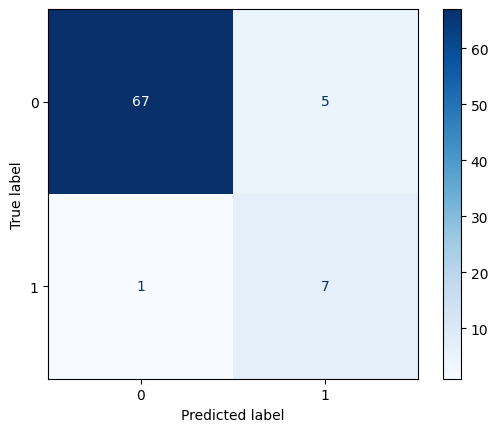

In [145]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)  # counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

### Anaylze the Mistakes (10 points)

Compute the confusion matrix and answer the following questions:

- **Question 2.3 (3 points):** How many *benign* cases were predicted as *malignant*?

- **Answer:** 5 (might vary due to the random seed )

- **Question 2.4 (3 points):** How many *malignant* cases were predicted as *benign*?

- **Answer:** 1 (might vary due to the random seed )

- **Question 2.5 (4 points):** Are the two error types equivalent in consequence?

- **Answer:** No. In this clinical context, false negatives are typically more severe because they may delay treatment, whereas false positives mainly lead to additional testing and anxiety.

### Compute the metrics (5 points)

In [146]:
TP = np.sum(np.logical_and(y_test_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_test_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_test_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_test_pred == 0, y_test == 1))

# your code here
print(f"Precision:{TP/(TP+FP) if (TP+FP) != 0 else 0.0:.4f}")
print(f"Recall:{TP/(TP+FN) if (TP+FN) != 0 else 0.0:.4f}")
print(f"F1-score:{2*TP/(2*TP + FP + FN) if (2*TP + FP + FN) != 0 else 0.0:.4f}")

Precision:0.5833
Recall:0.8750
F1-score:0.7000


## 2.3 Improve model performance by reweighting (15 points)

“Reweighting” means: give each class $c$ a weight $w_c$ so the loss pays more attention to rare classes.

Args:
- `class_weight`: Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


**Task 2.1 (10 points):** Play around with the `class_weight` and see how it affects the performance. What's your observation?

**Answer:** class_weight can adjust the model's emphasis on the minority class. Increasing the weight of the minority class can decrease FN but may also lead to increase FP, which in turn affects Recall and Precision.

**Question 2.6 (5 points):** When you do your best, how many lives could you save (from FN to TP) compared to the baseline model?

**Answer:** Compared to baseline (FN=1), the best setting balanced reduces FN to 1, saving 0 lives (FN->TP)

In [147]:
# Set class_weight, here is a balanced example
class_weight = "balanced"

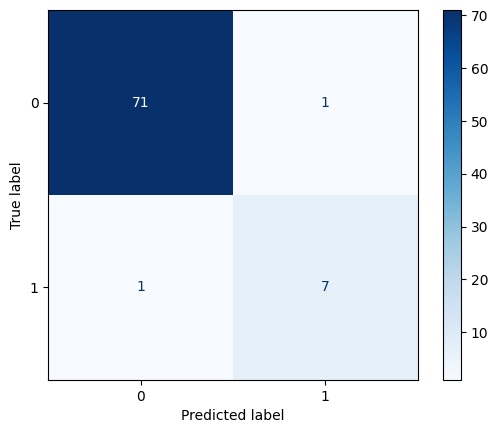

In [148]:
model = DecisionTreeClassifier(class_weight=class_weight, random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_test_pred

cm = confusion_matrix(y_test, y_test_pred)  # counts
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

In [149]:
TP = np.sum(np.logical_and(y_test_pred == 1, y_test == 1))
TN = np.sum(np.logical_and(y_test_pred == 0, y_test == 0))
FP = np.sum(np.logical_and(y_test_pred == 1, y_test == 0))
FN = np.sum(np.logical_and(y_test_pred == 0, y_test == 1))

print("Precision = ", TP / (TP+FP))
print("Recall = ", TP / (TP+FN))
print("F1-score = ", 2*TP/(2*TP+FP+FN))

Precision =  0.875
Recall =  0.875
F1-score =  0.875


Thank you for your efforts!